### MADE course  "ML in product"

### Project number 1 (Classification)

**Context**

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

 - Customers who left within the last month – the column is called Churn
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 - Demographic info about customers – gender, age range, and if they have partners and dependents
 
**Inspiration**

To explore this type of models and learn more about the subject.

#### Import module

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

from xverse.transformer import WOE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [2]:
%matplotlib inline
DATASET_PATH = "../data/raw/telecom_users.csv"
df_original = pd.read_csv(DATASET_PATH)
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.shape

(5986, 21)

In [7]:
def change_to_float(x):
    if x != " ":
        return np.float(x)
    else:
        return x

df['TotalCharges'] = df['TotalCharges'].map(change_to_float)
TotalCharges_mean = df[df['TotalCharges']!=' ']['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].replace(" ", TotalCharges_mean)

In [8]:
churn_map = {"No": 0, "Yes": 1}
targets = df.Churn.map(churn_map)
df['targets'] = targets
df = df.drop(columns = ["customerID", "Churn"])

The dataset contains 5986 raws. There is no any None values and duplicates in dataset. We have 19 features, both categorical and numerical. One may approximately considered dataset as balanced  

#### Feature analys

In [9]:
numerical_columns = ['tenure', 'MonthlyCharges', "TotalCharges"]

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

##### Analys for numerical features:

In [10]:
df_num = df[numerical_columns + ['targets']]

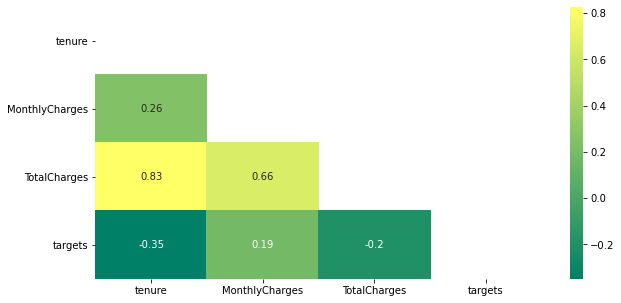

In [11]:
corr_matrix = df_num.corr()
masks = np.zeros_like(corr_matrix)
masks[np.triu_indices_from(masks)] = True
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot = True, cmap = "summer", mask = masks);

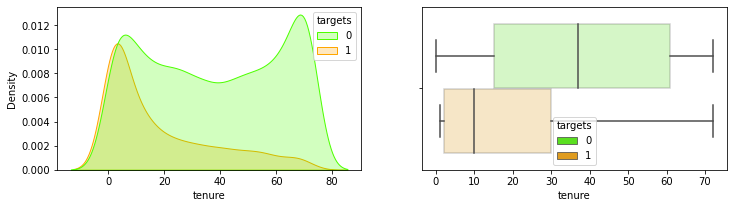

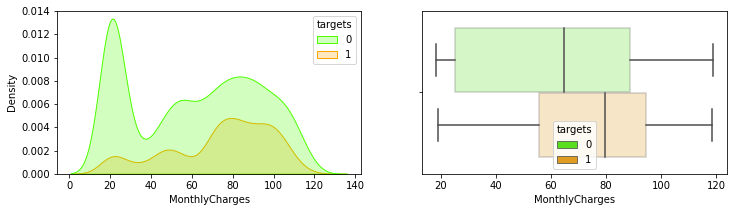

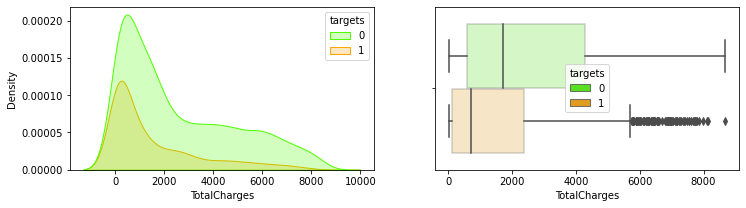

In [12]:
palette_1 = "#4dff00"
palette_2 ="#ffa600"

for feature in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))
    
    sns.kdeplot(x=feature, data=df_num, hue='targets', ax=ax[0], 
                shade=True, alpha=0.25, palette=[palette_1, palette_2])
    
    sns.boxplot(x=feature, data=df_num, hue='targets', y=['']*len(df), ax=ax[1],
                palette=[palette_1, palette_2], boxprops=dict(alpha=.25))
    plt.tight_layout

As one can see, the clients who left were mostly characterized by a high monthly payment and they left after 10 months on average, i.e. unsubscribed fairly quickly

##### Analys for categorical  features:

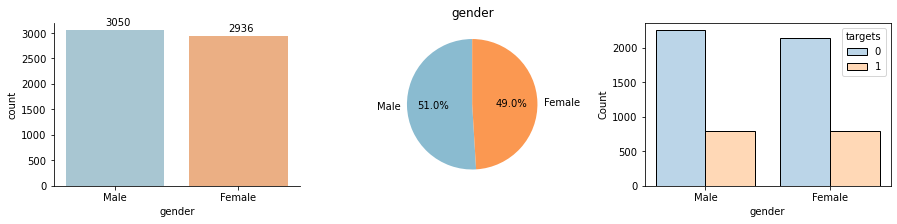

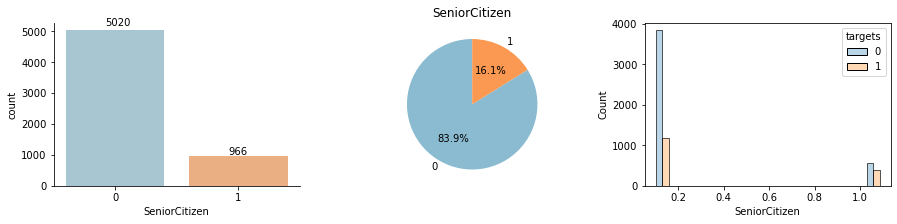

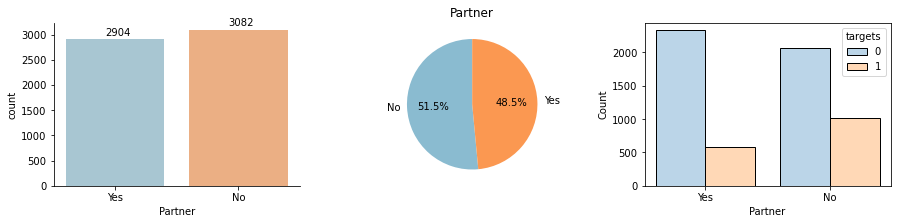

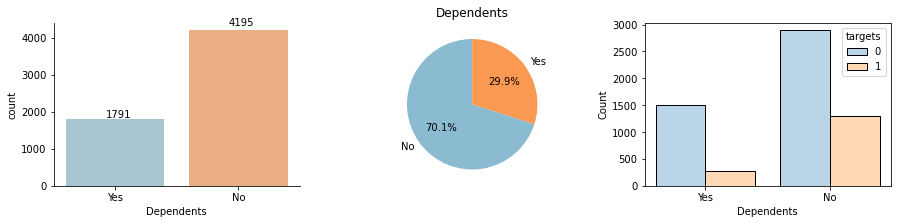

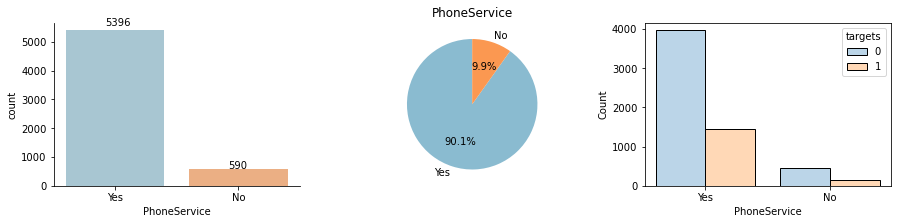

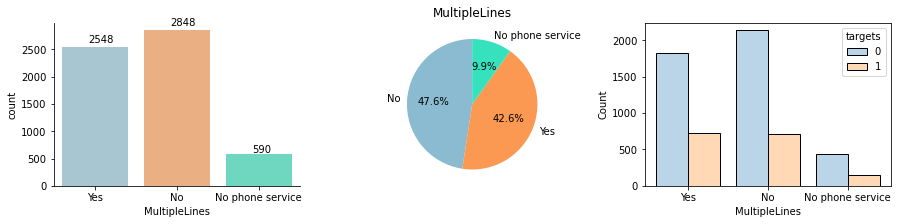

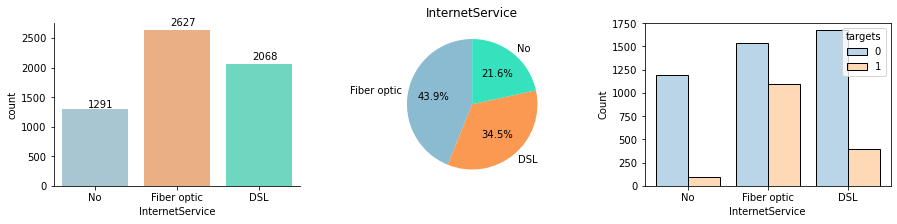

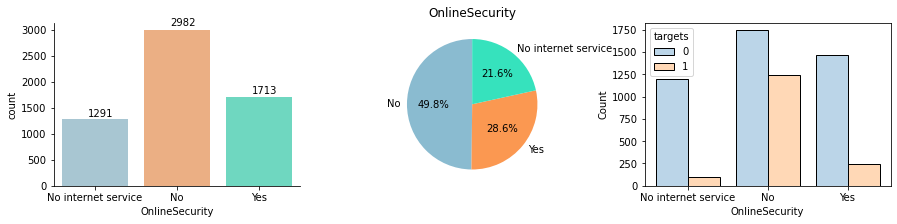

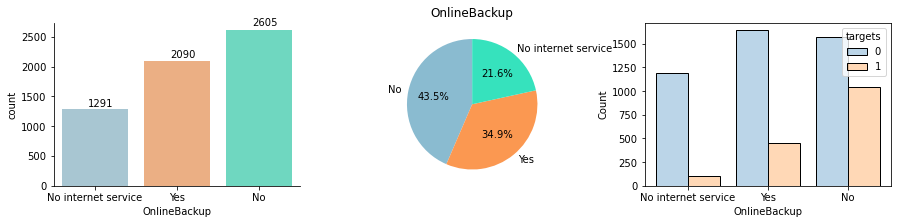

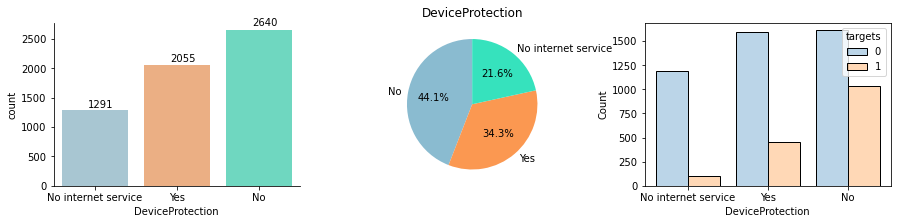

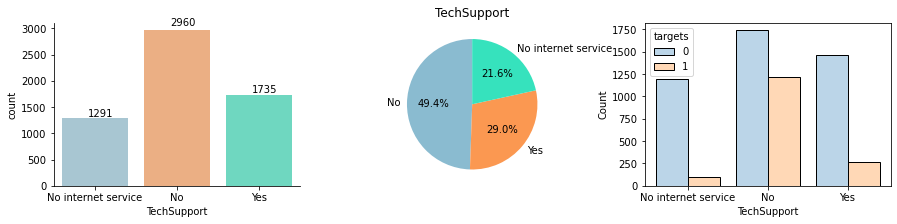

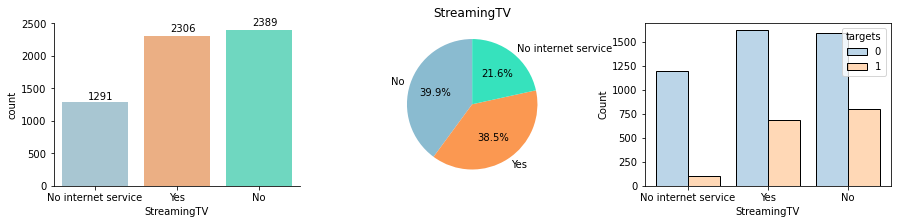

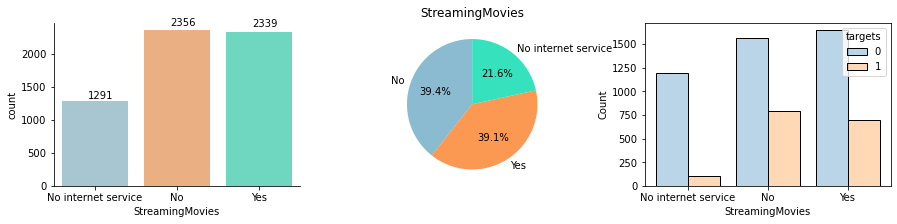

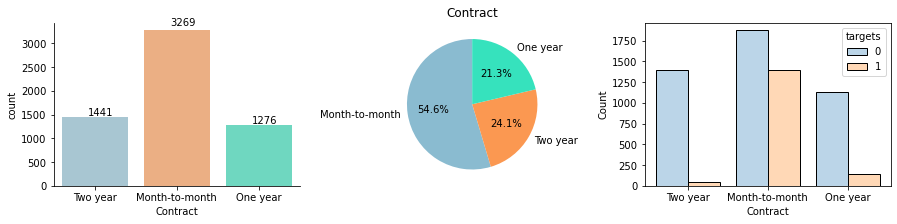

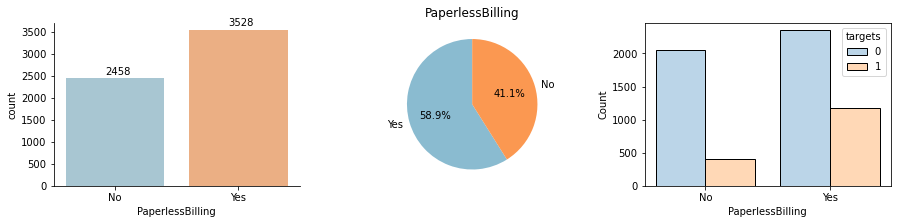

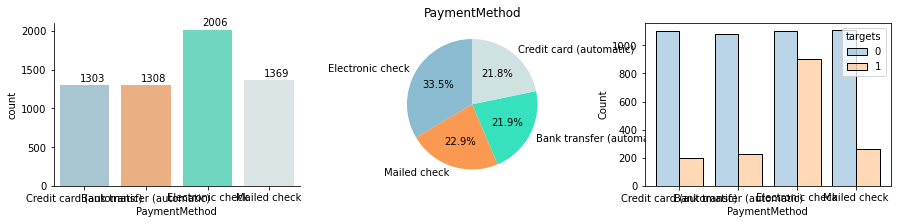

In [13]:
palette = ['#8abbd0', '#FB9851', '#36E2BD','#D0E1E1']

for feature in categorical_columns:
    fig, ax = plt.subplots(1, 3, figsize=(15,3))


    sns.countplot(x=df[feature], data=df, ax=ax[0], palette=palette, alpha=0.8)
    for p, label in zip(ax[0].patches, df[feature].value_counts().index):
        ax[0].annotate(p.get_height(), (p.get_x()+p.get_width()/2.5, p.get_height()*1.03))
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
                    
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=ax[1], colors=palette)
    ax[1].set_ylabel('')
    ax[1].set_title(feature)

    sns.histplot(x=feature,data=df, hue='targets', multiple="dodge", ax=ax[2], alpha=0.3, shrink=.8)  
    
    plt.tight_layout
    

Clients tend to break agreements:

 - among senior citizens
 - who is married
 - with dependents
 - with Internet provider ```Fiber optic InternetService```
 - with disabled ```OnlineBackup service```
 - without equipment insurance
 - disabled technical support
 - with contract type ```Month-to-month Contract```
 - with payment method ```Bank transfer```

#### Featrue correlation with target

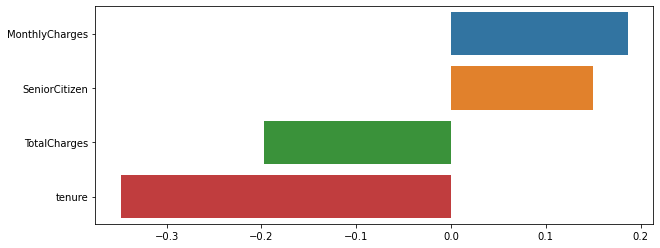

In [14]:
correlatons_df = df.corr().iloc[:-1, -1].sort_values(ascending=False)
features_ = correlatons_df.index
cor_values = correlatons_df.values
plt.figure(figsize=(10, 4))
sns.barplot(cor_values, features_)
plt.show()

In [15]:
woe = WOE()
all_features = df.drop(['targets'], axis=1)
target = df['targets']
woe.fit(all_features, target)
woe.iv_df

,Variable_Name,Information_Value
0,Contract,1.231045
7,OnlineSecurity,0.707215
15,TechSupport,0.671190
18,tenure,0.641572
3,InternetService,0.589713
6,OnlineBackup,0.511780
2,DeviceProtection,0.486933
10,PaymentMethod,0.442319
13,StreamingMovies,0.365478
14,StreamingTV,0.364508


The most  3  important features are: `Contract`, `OnlineSecurity`, `TechSupport`

#### Models training and testing

In [16]:
def get_one_hot_features(data, categorical_columns):
    return pd.get_dummies(data[categorical_columns])

def show_scores(y_test, y_pred):
    print(f"accuracy score:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"f1_score:        {f1_score(y_test, y_pred):.3f}")
    print(f"roc_auc_score:   {roc_auc_score(y_test, y_pred):.3f}")        ,


In [17]:
data= df[numerical_columns]
data = pd.concat((data, get_one_hot_features(df, categorical_columns)), axis = 1)
data.shape

(5986, 45)

In [18]:
data.head(3)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,72,24.10,1734.65,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
1,44,88.15,3973.20,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,38,74.95,2869.85,1,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0


In [19]:
TEST_SIZE = 0.3

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=TEST_SIZE)

def train_model(model, 
                X_train = X_train, 
                y_train = y_train,
                X_test = X_test, 
                y_test = y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    show_scores(y_test, y_pred)

In [22]:
log_reg = LogisticRegression(C=3)
train_model(log_reg)

accuracy score:  0.803
f1_score:        0.582
roc_auc_score:   0.715


In [23]:
grad_boost = GradientBoostingClassifier(n_estimators=100)
train_model(grad_boost)

accuracy score:  0.805
f1_score:        0.572
roc_auc_score:   0.708


In [24]:
random_forest = RandomForestClassifier(n_estimators=500, min_samples_leaf=5,  min_samples_split=15)
train_model(random_forest)

accuracy score:  0.805
f1_score:        0.556
roc_auc_score:   0.697
